In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## DATA PREPROCESSING

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/LSTM/X_train.csv')

In [ ]:
data.columns

Index(['Unnamed: 0', 'IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR',
       'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES',
       'IN_PKTS', 'OUT_PKTS', 'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS',
       'Label', 'Attack'],
      dtype='object')

In [ ]:
data['Attack'].unique()

array(['Reconnaissance', 'DDoS', 'DoS', 'Benign', 'Theft'], dtype=object)

In [ ]:
data.shape

(480080, 15)

In [ ]:
data.head(10)

,Unnamed: 0,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,380652,192.168.100.150,42209,192.168.100.7,7676,6,0.0,44,40,1,1,22,4294966,1,Reconnaissance
1,562516,192.168.100.149,39730,192.168.100.3,80,6,7.0,816,718,6,4,30,0,1,DDoS
2,441478,192.168.100.147,51614,192.168.100.3,1062,6,0.0,44,40,1,1,22,4294967,1,Reconnaissance
3,585711,192.168.100.147,54962,192.168.100.3,80,6,7.0,756,770,7,5,31,0,1,DDoS
4,144822,192.168.100.150,59416,192.168.100.3,366,6,0.0,44,40,1,1,22,4294967,1,Reconnaissance
5,34556,192.168.100.148,55328,192.168.100.7,80,6,7.0,819,1340,5,4,27,4260383,1,DDoS
6,87872,192.168.100.148,55499,192.168.100.7,8007,6,0.0,44,40,1,1,22,4294966,1,Reconnaissance
7,124441,192.168.100.150,14441,192.168.100.3,12163,6,0.0,40,40,1,1,22,4294967,1,Reconnaissance
8,559285,192.168.100.149,37532,192.168.100.3,80,6,7.0,837,770,7,5,31,0,1,DDoS
9,18037,192.168.100.149,56704,192.168.100.7,80,6,7.0,649,1340,5,4,27,4262755,1,DoS


In [ ]:
data = data.sort_values(by='FLOW_DURATION_MILLISECONDS', ascending=True)
data

,Unnamed: 0,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
118313,490143,192.168.100.149,33163,192.168.100.3,40116,17,0.0,28,0,1,0,0,0,1,Reconnaissance
69035,471906,192.168.100.149,36228,192.168.100.3,20872,17,0.0,28,0,1,0,0,0,1,Reconnaissance
313489,39758,192.168.100.148,56742,192.168.100.7,80,6,7.0,52,0,1,0,20,0,1,DDoS
167853,485997,192.168.100.148,40726,192.168.100.3,20164,17,0.0,28,0,1,0,0,0,1,Reconnaissance
167854,587117,192.168.100.148,41364,192.168.100.3,80,6,7.0,759,770,7,5,31,0,1,Reconnaissance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230531,124471,192.168.100.147,14068,192.168.100.3,12168,6,0.0,40,40,1,1,22,4294967,1,Reconnaissance
230532,154464,192.168.100.150,51392,192.168.100.6,5101,6,0.0,44,40,1,1,22,4294967,1,Reconnaissance
230533,377048,192.168.100.150,35964,192.168.100.6,5269,6,0.0,44,40,1,1,22,4294967,1,Reconnaissance
230535,394416,192.168.100.150,52217,192.168.100.6,1062,6,0.0,44,40,1,1,22,4294967,1,Reconnaissance


In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data.Label.value_counts()

1    468937
0     11143
Name: Label, dtype: int64

In [ ]:
data.drop(columns=['IPV4_SRC_ADDR','IPV4_DST_ADDR'],inplace=True)

In [ ]:
data['out-in_pkts']=data.OUT_PKTS-data.IN_PKTS

In [ ]:
data['out-in_bytes']=data.OUT_BYTES-data.IN_BYTES

In [ ]:
df = data.drop('Attack', axis=1)

In [ ]:
df.corr()

,Unnamed: 0,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,out-in_pkts,out-in_bytes
Unnamed: 0,1.000000,-0.084834,0.070172,0.213140,0.079061,-0.009893,-0.004410,-0.014789,-0.008774,-0.080953,-0.437961,-0.074560,0.011502,0.000883
L4_SRC_PORT,-0.084834,1.000000,-0.060187,-0.032670,-0.236361,-0.077784,-0.030139,-0.154022,-0.081390,0.143799,0.007785,0.191546,0.128395,0.011075
L4_DST_PORT,0.070172,-0.060187,1.000000,0.211896,-0.108081,-0.010812,0.008336,-0.021712,-0.008341,-0.198035,0.046134,-0.020502,0.020800,0.012950
PROTOCOL,0.213140,-0.032670,0.211896,1.000000,-0.045723,0.034025,0.008609,0.067290,0.039467,-0.614049,-0.404820,-0.352958,-0.052723,-0.009012
L7_PROTO,0.079061,-0.236361,-0.108081,-0.045723,1.000000,-0.003500,-0.001673,-0.006457,-0.002567,0.045935,0.048169,-0.111708,0.006112,0.000210
IN_BYTES,-0.009893,-0.077784,-0.010812,0.034025,-0.003500,1.000000,0.083419,0.704815,0.432671,-0.055709,0.008240,-0.135825,-0.535612,-0.419365
OUT_BYTES,-0.004410,-0.030139,0.008336,0.008609,-0.001673,0.083419,1.000000,0.199579,0.437176,-0.012201,0.003337,-0.031710,0.119673,0.869671
IN_PKTS,-0.014789,-0.154022,-0.021712,0.067290,-0.006457,0.704815,0.199579,1.000000,0.632265,-0.105871,0.012739,-0.262799,-0.744077,-0.167321
OUT_PKTS,-0.008774,-0.081390,-0.008341,0.039467,-0.002567,0.432671,0.437176,0.632265,1.000000,-0.053948,0.007379,-0.144470,0.047153,0.183937
TCP_FLAGS,-0.080953,0.143799,-0.198035,-0.614049,0.045935,-0.055709,-0.012201,-0.105871,-0.053948,1.000000,0.220714,0.255931,0.089978,0.016481


In [ ]:
x = df.drop('Label',axis=1).values.T
y = df.Label.values

# calculate R2 value
r = np.corrcoef(x, y)[0, 1]
r2 = r**2

print("R2 value:", r2)

R2 value: 0.007196813036031153


In [ ]:
df.describe()

,Unnamed: 0,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,out-in_pkts,out-in_bytes
count,480080.000000,480080.000000,480080.000000,480080.000000,480080.000000,4.800800e+05,4.800800e+05,480080.000000,480080.000000,480080.000000,4.800800e+05,480080.000000,480080.000000,4.800800e+05
mean,299968.895951,46536.996773,7939.406722,6.585013,8.966430,9.018442e+03,6.462043e+03,12.667522,5.592199,21.853139,3.467977e+06,0.976789,-7.075323,-2.556399e+03
std,173241.390702,12029.649236,14094.175591,2.566742,34.992163,3.960930e+05,7.284372e+05,251.183804,168.001135,8.111385,1.666084e+06,0.150572,194.821867,7.996081e+05
min,0.000000,0.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,-27852.000000,-2.276700e+08
25%,150058.500000,39180.000000,80.000000,6.000000,0.000000,4.400000e+01,4.000000e+01,1.000000,1.000000,22.000000,4.277944e+06,1.000000,-1.000000,-2.000000e+01
50%,300014.500000,47922.000000,1864.000000,6.000000,0.000000,4.400000e+01,4.000000e+01,1.000000,1.000000,22.000000,4.294966e+06,1.000000,0.000000,-4.000000e+00
75%,449946.250000,55308.000000,8008.000000,6.000000,7.000000,1.120000e+02,4.000000e+01,2.000000,1.000000,22.000000,4.294967e+06,1.000000,0.000000,-4.000000e+00
max,600098.000000,65535.000000,65535.000000,17.000000,244.000000,2.282235e+08,2.432197e+08,37817.000000,34154.000000,214.000000,4.294967e+06,1.000000,24241.000000,2.426663e+08


<Axes: >

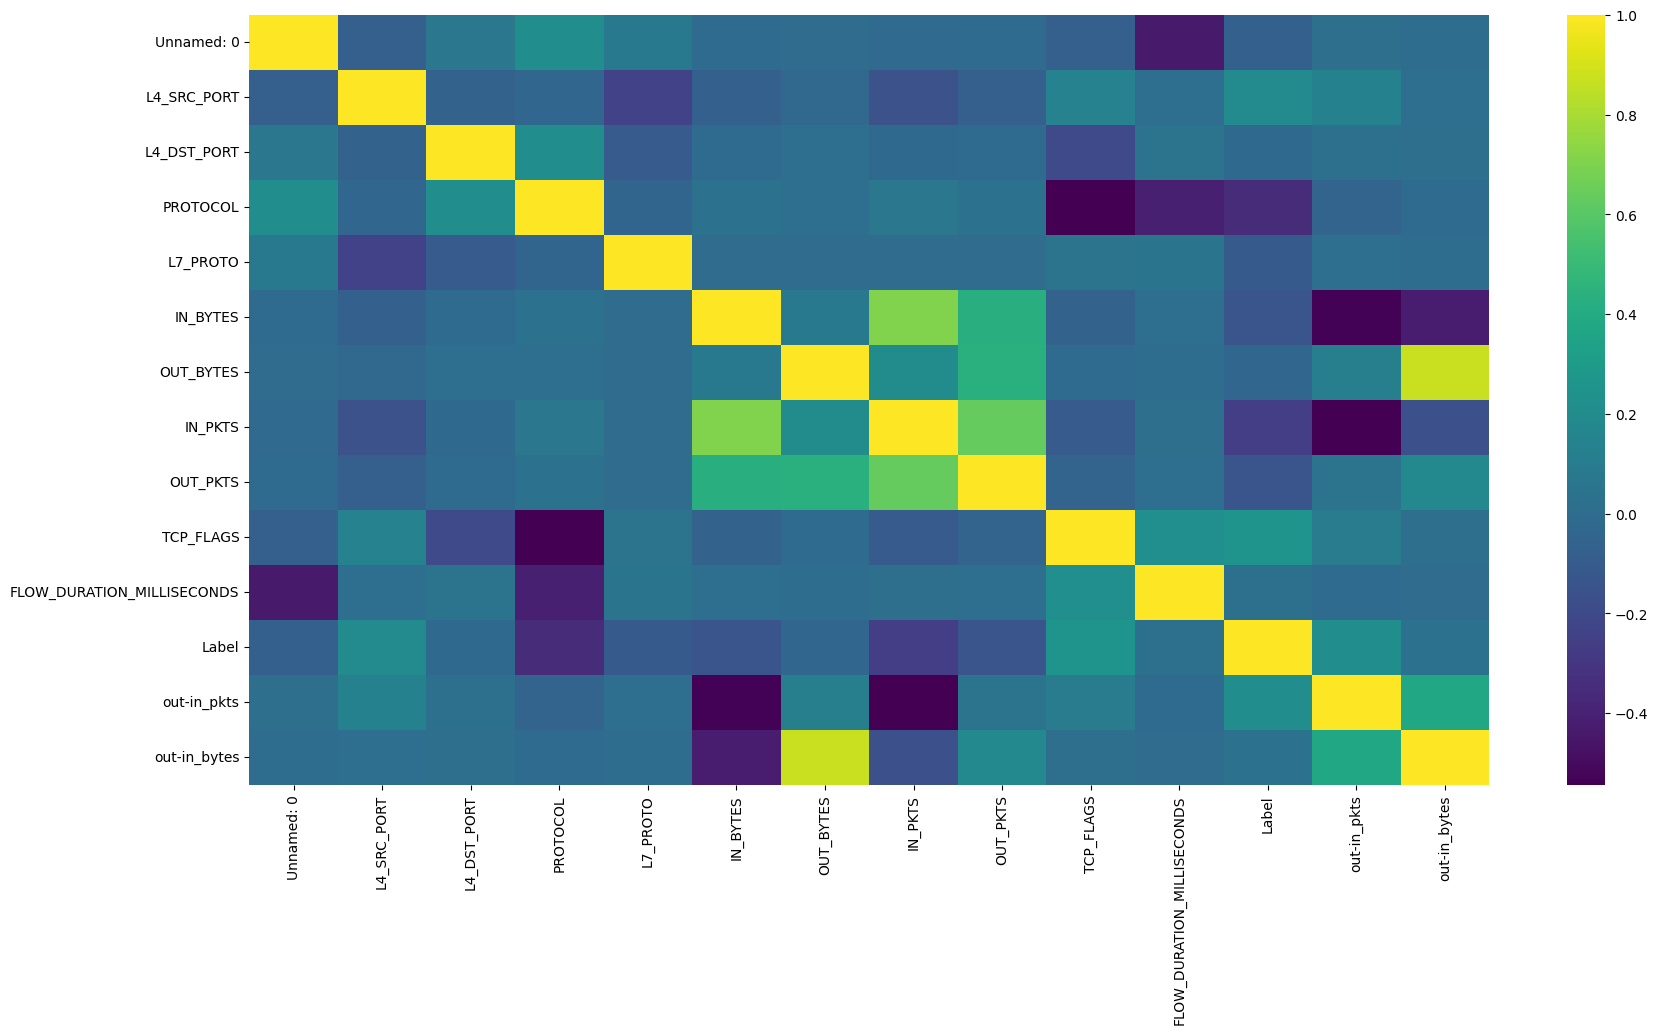

In [ ]:
plt.figure(figsize=(20, 10))

sns.heatmap(df.corr(),robust=True,cmap='viridis')

In [ ]:
data.drop(columns=['OUT_PKTS','out-in_pkts'],axis=1,inplace=True)

In [ ]:
data.corr()

<ipython-input-21-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Unnamed: 0,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,out-in_bytes
Unnamed: 0,1.000000,-0.084834,0.070172,0.213140,0.079061,-0.009893,-0.004410,-0.014789,-0.080953,-0.437961,-0.074560,0.000883
L4_SRC_PORT,-0.084834,1.000000,-0.060187,-0.032670,-0.236361,-0.077784,-0.030139,-0.154022,0.143799,0.007785,0.191546,0.011075
L4_DST_PORT,0.070172,-0.060187,1.000000,0.211896,-0.108081,-0.010812,0.008336,-0.021712,-0.198035,0.046134,-0.020502,0.012950
PROTOCOL,0.213140,-0.032670,0.211896,1.000000,-0.045723,0.034025,0.008609,0.067290,-0.614049,-0.404820,-0.352958,-0.009012
L7_PROTO,0.079061,-0.236361,-0.108081,-0.045723,1.000000,-0.003500,-0.001673,-0.006457,0.045935,0.048169,-0.111708,0.000210
IN_BYTES,-0.009893,-0.077784,-0.010812,0.034025,-0.003500,1.000000,0.083419,0.704815,-0.055709,0.008240,-0.135825,-0.419365
OUT_BYTES,-0.004410,-0.030139,0.008336,0.008609,-0.001673,0.083419,1.000000,0.199579,-0.012201,0.003337,-0.031710,0.869671
IN_PKTS,-0.014789,-0.154022,-0.021712,0.067290,-0.006457,0.704815,0.199579,1.000000,-0.105871,0.012739,-0.262799,-0.167321
TCP_FLAGS,-0.080953,0.143799,-0.198035,-0.614049,0.045935,-0.055709,-0.012201,-0.105871,1.000000,0.220714,0.255931,0.016481
FLOW_DURATION_MILLISECONDS,-0.437961,0.007785,0.046134,-0.404820,0.048169,0.008240,0.003337,0.012739,0.220714,1.000000,0.017453,-0.001041


In [ ]:
data['out_in_bytes_time']=(data.OUT_BYTES/data.IN_BYTES)*(data.FLOW_DURATION_MILLISECONDS*0.001)

In [ ]:
data.corr()

<ipython-input-23-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Unnamed: 0,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,out-in_bytes,out_in_bytes_time
Unnamed: 0,1.000000,-0.084834,0.070172,0.213140,0.079061,-0.009893,-0.004410,-0.014789,-0.080953,-0.437961,-0.074560,0.000883,-0.066497
L4_SRC_PORT,-0.084834,1.000000,-0.060187,-0.032670,-0.236361,-0.077784,-0.030139,-0.154022,0.143799,0.007785,0.191546,0.011075,-0.005024
L4_DST_PORT,0.070172,-0.060187,1.000000,0.211896,-0.108081,-0.010812,0.008336,-0.021712,-0.198035,0.046134,-0.020502,0.012950,0.003823
PROTOCOL,0.213140,-0.032670,0.211896,1.000000,-0.045723,0.034025,0.008609,0.067290,-0.614049,-0.404820,-0.352958,-0.009012,-0.037404
L7_PROTO,0.079061,-0.236361,-0.108081,-0.045723,1.000000,-0.003500,-0.001673,-0.006457,0.045935,0.048169,-0.111708,0.000210,0.004392
IN_BYTES,-0.009893,-0.077784,-0.010812,0.034025,-0.003500,1.000000,0.083419,0.704815,-0.055709,0.008240,-0.135825,-0.419365,-0.000736
OUT_BYTES,-0.004410,-0.030139,0.008336,0.008609,-0.001673,0.083419,1.000000,0.199579,-0.012201,0.003337,-0.031710,0.869671,0.812449
IN_PKTS,-0.014789,-0.154022,-0.021712,0.067290,-0.006457,0.704815,0.199579,1.000000,-0.105871,0.012739,-0.262799,-0.167321,0.043862
TCP_FLAGS,-0.080953,0.143799,-0.198035,-0.614049,0.045935,-0.055709,-0.012201,-0.105871,1.000000,0.220714,0.255931,0.016481,0.037250
FLOW_DURATION_MILLISECONDS,-0.437961,0.007785,0.046134,-0.404820,0.048169,0.008240,0.003337,0.012739,0.220714,1.000000,0.017453,-0.001041,0.105257


In [ ]:
data.drop('out_in_bytes_time',axis=1,inplace=True)

In [ ]:
data.columns

Index(['Unnamed: 0', 'L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO',
       'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'Label', 'Attack', 'out-in_bytes'],
      dtype='object')

## note
we did an outlier detection using isolation forest, but not outlier was found

In [ ]:
column_to_encode = "Attack"

# One-hot encode the column
one_hot = pd.get_dummies(data[column_to_encode])

# Drop the original column
df2 = data.drop(column_to_encode, axis=1)

# Concatenate the one-hot encoded column back to the dataframe
df2 = pd.concat([df2, one_hot], axis=1)

In [ ]:
column_to_encode = "Attack"

# One-hot encode the column
one_hot = pd.get_dummies(data[column_to_encode])

# Drop the original column
data = data.drop(column_to_encode, axis=1)

In [ ]:
# Concatenate the one-hot encoded column back to the dataframe
data = pd.concat([data, one_hot], axis=1)

In [ ]:
data.drop('Theft',axis=1,inplace=True)

In [ ]:
data.shape

(480080, 16)

## ANOVA

In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
data.columns

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES',
       'OUT_BYTES', 'IN_PKTS', 'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS',
       'Label', 'out-in_bytes', 'Benign', 'DDoS', 'DoS', 'Reconnaissance'],
      dtype='object')

In [ ]:
len(data.columns)

15

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480080 entries, 0 to 480079
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   L4_SRC_PORT                 480080 non-null  int64  
 1   L4_DST_PORT                 480080 non-null  int64  
 2   PROTOCOL                    480080 non-null  int64  
 3   L7_PROTO                    480080 non-null  float64
 4   IN_BYTES                    480080 non-null  int64  
 5   OUT_BYTES                   480080 non-null  int64  
 6   IN_PKTS                     480080 non-null  int64  
 7   TCP_FLAGS                   480080 non-null  int64  
 8   FLOW_DURATION_MILLISECONDS  480080 non-null  int64  
 9   Label                       480080 non-null  int64  
 10  out-in_bytes                480080 non-null  int64  
 11  Benign                      480080 non-null  uint8  
 12  DDoS                        480080 non-null  uint8  
 13  DoS           

In [ ]:
X, y = data.drop(['Label', 'Benign', 'DDoS', 'DoS', 'Reconnaissance'], axis=1), df['Label']

In [ ]:
X.columns

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES',
       'OUT_BYTES', 'IN_PKTS', 'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS',
       'out-in_bytes'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Load the dataset
# X: input features, y: target variable
X, y = data.drop(['Label', 'Benign', 'DDoS', 'DoS', 'Reconnaissance'], axis=1), df['Label']

# Define the feature selection method
fvalue_selector = SelectKBest(f_classif, k=10)

# Apply the feature selection method to the dataset
X_kbest = fvalue_selector.fit_transform(X, y)
selected_features_num = fvalue_selector.get_support(indices=True)
X.columns[selected_features_num]

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES',
       'OUT_BYTES', 'IN_PKTS', 'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS',
       'out-in_bytes'],
      dtype='object')

In [ ]:
data.corr()['Label']

L4_SRC_PORT                   0.191546
L4_DST_PORT                  -0.020502
PROTOCOL                     -0.352958
L7_PROTO                     -0.111708
IN_BYTES                     -0.135825
OUT_BYTES                    -0.031710
IN_PKTS                      -0.262799
TCP_FLAGS                     0.255931
FLOW_DURATION_MILLISECONDS    0.017453
Label                         1.000000
out-in_bytes                  0.038395
Benign                       -1.000000
DDoS                          0.049871
DoS                           0.049835
Reconnaissance                0.293871
Name: Label, dtype: float64

after ANOVA we finalised 10 features out of 12
- `'L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'out-in_bytes'`

In [ ]:
data.drop(['Benign', 'DDoS', 'DoS', 'Reconnaissance'], axis=1, inplace=True)

In [ ]:
data.columns

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES',
       'OUT_BYTES', 'IN_PKTS', 'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS',
       'Label', 'out-in_bytes'],
      dtype='object')

In [ ]:
df2=data.drop('Label',axis=1)
df2.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,out-in_bytes
0,33163,40116,17,0.0,28,0,1,0,0,-28
1,36228,20872,17,0.0,28,0,1,0,0,-28
2,56742,80,6,7.0,52,0,1,20,0,-52
3,40726,20164,17,0.0,28,0,1,0,0,-28
4,41364,80,6,7.0,759,770,7,31,0,11


In [ ]:
df2['FLOW_DURATION_MILLISECONDS']*=0.001

In [ ]:
column = df2[["IN_PKTS", "IN_BYTES", "OUT_BYTES", "out-in_bytes"]] #"out-in_pkts"


# Normalize the column
normalized_column = (column - column.mean()) / column.std()

# Replace the original column with the normalized column
df2[["IN_PKTS", "IN_BYTES", "OUT_BYTES", "out-in_bytes"]] = normalized_column #"out-in_pkts"

In [ ]:
df2.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,out-in_bytes
0,33163,40116,17,0.0,-0.022698,-0.008871,-0.046450,0,0.0,0.003162
1,36228,20872,17,0.0,-0.022698,-0.008871,-0.046450,0,0.0,0.003162
2,56742,80,6,7.0,-0.022637,-0.008871,-0.046450,20,0.0,0.003132
3,40726,20164,17,0.0,-0.022698,-0.008871,-0.046450,0,0.0,0.003162
4,41364,80,6,7.0,-0.020852,-0.007814,-0.022563,31,0.0,0.003211


In [ ]:
df2.shape

(480080, 10)

In [ ]:
df2=df2.values
df2 = df2.reshape(df2.shape[0], 10, 1)

In [ ]:
df2.shape

(480080, 10, 1)

In [ ]:
# Define the percentage for training data
train_percentage = 0.8

# Calculate the index to split the data
split_index = int(df2.shape[0] * train_percentage)

# Split the data into training and validation sets
train_data = df2[:split_index]  # First 80% of data for training
val_data = df2[split_index:]  # Remaining 20% for validation

# If you also have target labels, you can split them accordingly
train_labels = data['Label'].values[:split_index]
val_labels = data['Label'].values[split_index:]

# Print the shapes of the resulting sets
print("X_train shape:", train_data.shape)
print("X_valid shape:", val_data.shape)

X_train shape: (384064, 10, 1)
X_valid shape: (96016, 10, 1)


In [ ]:
data['Label'].values[:384064]

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
#from sklearn.model_selection import train_test_split

# Split the data into a training set and a test set
#train_data, val_data, train_labels, val_labels = train_test_split(df2, data['Label'].values, test_size=0.2, random_state=0,stratify=data.Label)

## MODEL BUILDING : LABEL CLASSIFICATION

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional,Dropout
from sklearn.naive_bayes import GaussianNB
from keras.layers import Input, Embedding, SpatialDropout1D, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam

def create_bilstm_model(input_shape):
    inputs = Input(shape=input_shape)

    # LSTM layers
    lstm_1 = Bidirectional(LSTM(128, return_sequences=True))(inputs)
    lstm_2 = Bidirectional(LSTM(256))(lstm_1)

    # Batch normalization
    batch_norm_1 = BatchNormalization()(lstm_2)

    # Dense layers with dropout
    dense_1 = Dense(128, activation='tanh')(batch_norm_1)
    dropout_1 = Dropout(0.5)(dense_1)

    dense_2 = Dense(64, activation='relu')(dropout_1)
    dense_3 = Dense(64, activation='tanh')(dense_2)
    dropout_2 = Dropout(0.25)(dense_3)

    # Output layer
    output = Dense(1, activation='sigmoid')(dropout_2)

    model = Model(inputs=inputs, outputs=output)

    return model
input_shape = (10, 1) #12
model = create_bilstm_model(input_shape)
print(model.summary())

# Define the Naive Bayes classifier
nb = GaussianNB()

from tensorflow.keras.metrics import Recall, AUC
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
#EarlyStopping: Stop training when a monitored metric has stopped improving.

reduce_lr_on_plateau=ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5)
#ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving.
# Compile the BiLSTM model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',Recall(),AUC()])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 bidirectional (Bidirection  (None, 10, 256)           133120    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 512)               1050624   
 onal)                                                           
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                             

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Assuming X_train, y_train are the training data and labels
class_weights = compute_class_weight(y=data['Label'],classes=np.unique(data['Label']),class_weight='balanced')
class_weights_dict = dict(enumerate(class_weights))
class_weight=class_weights_dict

# Train the BiLSTM model
model.fit(train_data, train_labels, epochs=40, batch_size=128, validation_data=[val_data,val_labels],class_weight=class_weights_dict,
         callbacks=[early_stopping,reduce_lr_on_plateau])

Epoch 1/40
3001/3001 [==============================] - 57s 16ms/step - loss: 0.1997 - accuracy: 0.8811 - recall: 0.8784 - auc: 0.9686 - val_loss: 0.8532 - val_accuracy: 0.1349 - val_recall: 0.1266 - val_auc: 0.9750 - lr: 0.0010
Epoch 2/40
3001/3001 [==============================] - 42s 14ms/step - loss: 0.1669 - accuracy: 0.8913 - recall: 0.8885 - auc: 0.9733 - val_loss: 0.1000 - val_accuracy: 0.9420 - val_recall: 0.9417 - val_auc: 0.9837 - lr: 0.0010
Epoch 3/40
3001/3001 [==============================] - 42s 14ms/step - loss: 0.1559 - accuracy: 0.9005 - recall: 0.8979 - auc: 0.9753 - val_loss: 0.0701 - val_accuracy: 0.9708 - val_recall: 0.9707 - val_auc: 0.9800 - lr: 0.0010
Epoch 4/40
3001/3001 [==============================] - 43s 14ms/step - loss: 0.1602 - accuracy: 0.8971 - recall: 0.8944 - auc: 0.9739 - val_loss: 0.0633 - val_accuracy: 0.9739 - val_recall: 0.9737 - val_auc: 0.9824 - lr: 0.0010
Epoch 5/40
3001/3001 [==============================] - 49s 16ms/step - loss: 0.1597

In [ ]:

pickle.dump(model, open('/content/drive/MyDrive/LSTM/bilstm.pkl','wb'))

In [ ]:
model= pickle.load(open(r'/content/drive/MyDrive/LSTM/bilstm.pkl',"rb"))

In [ ]:
test_data=pd.read_csv(r'/content/drive/MyDrive/LSTM/X_test.csv')
test_data = test_data.sort_values(by='FLOW_DURATION_MILLISECONDS', ascending=True)
test_data = test_data.reset_index(drop=True)
test_data

,Unnamed: 0,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,542447,192.168.100.149,53774,192.168.100.3,80,6,7.0,799,770,7,5,31,0,1,Reconnaissance
1,589566,192.168.100.147,56252,192.168.100.3,80,6,7.0,823,770,7,5,31,0,1,DoS
2,487643,192.168.100.149,33163,192.168.100.3,19500,17,0.0,28,0,1,0,0,0,1,Reconnaissance
3,579534,192.168.100.147,52750,192.168.100.3,80,6,7.0,801,770,7,5,31,0,1,Reconnaissance
4,486705,192.168.100.149,33163,192.168.100.3,112,17,0.0,28,0,1,0,0,0,1,Reconnaissance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120015,182460,192.168.100.147,41052,192.168.100.3,2043,6,0.0,44,40,1,1,22,4294967,1,Reconnaissance
120016,413127,192.168.100.147,38498,192.168.100.6,6881,6,0.0,44,40,1,1,22,4294967,1,Reconnaissance
120017,97995,192.168.100.150,55197,192.168.100.6,2106,6,0.0,44,40,1,1,22,4294967,1,Reconnaissance
120018,90893,192.168.100.147,63583,192.168.100.3,2004,6,0.0,44,40,1,1,22,4294967,1,Reconnaissance


In [ ]:
td=test_data.copy()
test_data.drop(columns=['IPV4_SRC_ADDR','IPV4_DST_ADDR','Unnamed: 0'],inplace=True)
test_data['out-in_pkts']=test_data.OUT_PKTS-test_data.IN_PKTS
test_data['out-in_bytes']=test_data.OUT_BYTES-test_data.IN_BYTES
df3 = test_data.drop('Attack', axis=1)
test_data.drop(columns=['OUT_PKTS','out-in_pkts'],axis=1,inplace=True)

column_to_encode = "Attack"
# One-hot encode the column
one_hot = pd.get_dummies(test_data[column_to_encode])
# Drop the original column
df3 = test_data.drop(column_to_encode, axis=1)
# Concatenate the one-hot encoded column back to the dataframe
df3 = pd.concat([df3, one_hot], axis=1)

column_to_encode = "Attack"
# One-hot encode the column
one_hot = pd.get_dummies(test_data[column_to_encode])
# Drop the original column
test_data = test_data.drop(column_to_encode, axis=1)

# Concatenate the one-hot encoded column back to the dataframe
test_data = pd.concat([test_data, one_hot], axis=1)

test_data.drop('Theft',axis=1,inplace=True)
test_data.drop(columns=['Benign','DDoS','DoS','Reconnaissance'],axis=1,inplace=True)

df3=test_data.drop('Label',axis=1)
df3.head()

df3['FLOW_DURATION_MILLISECONDS']*=0.001

column = df3[["IN_PKTS", "IN_BYTES", "OUT_BYTES", "out-in_bytes"]] #"out-in_pkts"
# Normalize the column
normalized_column = (column - column.mean()) / column.std()

# Replace the original column with the normalized column
df3[["IN_PKTS", "IN_BYTES", "OUT_BYTES", "out-in_bytes"]] = normalized_column #"out-in_pkts"

df3=df3.values
df3 = df3.reshape(df3.shape[0], 10, 1)

test_data=df3

In [ ]:
data_2d = df2.reshape(480080, 10)

In [ ]:
test_data.shape

(120020, 10, 1)

In [ ]:
data2d_test=test_data.reshape(120020, 10)

In [ ]:
data_2d.shape

(480080, 10)

In [ ]:
bilstm_output = model.predict(test_data)

3751/3751 [==============================] - 176s 46ms/step


In [ ]:
bilstm_output.shape

(120020, 1)

In [ ]:
updated_array = np.where(bilstm_output <= 0.5, 0, 1).reshape(-1)

# Print the updated array
print(updated_array)

updated_array.shape

[1 1 0 ... 1 1 1]


(120020,)

In [ ]:
data_2d.shape,data['Label'].shape

((480080, 10), (480080,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier using the BiLSTM outputs as features
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(data_2d,data['Label'].values)

rf_predictions = rf.predict(data2d_test)
accuracy_rf = np.mean(rf_predictions == td['Label'])
print("Accuracy of Random Forest:", accuracy_rf)

Accuracy of Random Forest: 0.9756290618230294


In [ ]:
rf_predictions.shape

(120020,)

In [ ]:
from sklearn.metrics import classification_report

# For Random Forest
print("Classification Report for Random Forest:")
print(classification_report(td['Label'], rf_predictions))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.47      0.63      0.54      2716
           1       0.99      0.98      0.99    117304

    accuracy                           0.98    120020
   macro avg       0.73      0.81      0.76    120020
weighted avg       0.98      0.98      0.98    120020



In [ ]:
from sklearn.metrics import confusion_matrix

# For Random Forest
confusion_rf = confusion_matrix(td['Label'], rf_predictions)
print("Confusion Matrix for Random Forest:")
print(confusion_rf)

Confusion Matrix for Random Forest:
[[  1717    999]
 [  1926 115378]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
# Define the models
knn_classifier = KNeighborsClassifier()
gaussian_nb_classifier = GaussianNB()
random_forest_classifier = RandomForestClassifier()
decision_tree_classifier = DecisionTreeClassifier()
logistic_regression_classifier = LogisticRegression()
ada_boost_classifier = AdaBoostClassifier()
gradient_boosting_classifier = GradientBoostingClassifier()
xgb_classifier = XGBClassifier()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Define a dictionary to store results
results = {}

# Iterate through each classifier
classifiers = {
    'KNeighborsClassifier': knn_classifier,
    'GaussianNB': gaussian_nb_classifier,
    'RandomForestClassifier': random_forest_classifier,
    'DecisionTreeClassifier': decision_tree_classifier,
    'LogisticRegression': logistic_regression_classifier,
    'AdaBoostClassifier': ada_boost_classifier,
    'GradientBoostingClassifier': gradient_boosting_classifier,
    'XGBClassifier': xgb_classifier,
}

for classifier_name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(data_2d, data['Label'].values)

    # Make predictions
    predictions = classifier.predict(data2d_test)

    # Calculate accuracy
    accuracy = np.mean(predictions == td['Label'])

    # Print the accuracy
    print(f"Accuracy of {classifier_name}: {accuracy}")

    # Calculate and print the classification report
    classification_rep = classification_report(td['Label'], predictions)
    print(f"Classification Report for {classifier_name}:\n{classification_rep}")

    # Calculate and print the confusion matrix
    confusion_mat = confusion_matrix(td['Label'], predictions)
    print(f"Confusion Matrix for {classifier_name}:\n{confusion_mat}")
    print("\n")

    # Store the results in the dictionary
    results[classifier_name] = {
        'Accuracy': accuracy,
        'Classification Report': classification_rep,
        'Confusion Matrix': confusion_mat
    }

Accuracy of KNeighborsClassifier: 0.9906182302949509
Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78      2716
           1       0.99      1.00      1.00    117304

    accuracy                           0.99    120020
   macro avg       0.92      0.86      0.89    120020
weighted avg       0.99      0.99      0.99    120020

Confusion Matrix for KNeighborsClassifier:
[[  1947    769]
 [   357 116947]]


Accuracy of GaussianNB: 0.933661056490585
Classification Report for GaussianNB:
              precision    recall  f1-score   support

           0       0.23      0.79      0.35      2716
           1       0.99      0.94      0.97    117304

    accuracy                           0.93    120020
   macro avg       0.61      0.86      0.66    120020
weighted avg       0.98      0.93      0.95    120020

Confusion Matrix for GaussianNB:
[[  2147    569]
 [  7393 109911]]


Accuracy of Ran

# ENSEMBLE

In [ ]:
predictions1 = knn_classifier.predict(data2d_test)
predictions2 = random_forest_classifier.predict(data2d_test)

2116 600
1745 115596

p55 r0.78

In [ ]:
# Add the arrays element-wise
sum_array = 0.89*predictions1 + 0.71*predictions2 + 1*updated_array

# Calculate the average
avg = sum_array/1.16

In [ ]:
result = np.where(avg <= 0.5, 0, 1)
# Print the updated array
print(result)

result.shape

[1 1 1 ... 1 1 1]


(120020,)

In [ ]:
classification_rep = classification_report(td['Label'], result)
print(f"Classification Report for \n{classification_rep}")

    # Calculate and print the confusion matrix
confusion_mat = confusion_matrix(td['Label'], result)
print(f"Confusion Matrix :\n{confusion_mat}")
print("\n")

Classification Report for 
              precision    recall  f1-score   support

           0       0.95      0.56      0.70      2716
           1       0.99      1.00      0.99    117304

    accuracy                           0.99    120020
   macro avg       0.97      0.78      0.85    120020
weighted avg       0.99      0.99      0.99    120020

Confusion Matrix :
[[  1520   1196]
 [    80 117224]]




BILSTM CLASSIFICATION REPORT

In [ ]:
classification_rep = classification_report(td['Label'], updated_array)
print(f"Classification Report for \n{classification_rep}")

    # Calculate and print the confusion matrix
confusion_mat = confusion_matrix(td['Label'], updated_array)
print(f"Confusion Matrix :\n{confusion_mat}")
print("\n")

Classification Report for 
              precision    recall  f1-score   support

           0       0.21      1.00      0.35      2716
           1       1.00      0.91      0.96    117304

    accuracy                           0.92    120020
   macro avg       0.61      0.96      0.65    120020
weighted avg       0.98      0.92      0.94    120020

Confusion Matrix :
[[  2710      6]
 [  9971 107333]]




#ATTACK CLASSIFICATION

In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/LSTM_project/FINAL FINAL/new_train_data.csv')
X_test = pd.read_csv('/content/drive/MyDrive/LSTM_project/FINAL FINAL/new_test_data.csv')

In [ ]:
X_test.head()

,Unnamed: 0,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Attack,predictions
0,542447,192.168.100.149,53774,192.168.100.3,80,6,7.0,799,770,7,5,31,0,Reconnaissance,1
1,589566,192.168.100.147,56252,192.168.100.3,80,6,7.0,823,770,7,5,31,0,DoS,1
2,487643,192.168.100.149,33163,192.168.100.3,19500,17,0.0,28,0,1,0,0,0,Reconnaissance,1
3,579534,192.168.100.147,52750,192.168.100.3,80,6,7.0,801,770,7,5,31,0,Reconnaissance,1
4,486705,192.168.100.149,33163,192.168.100.3,112,17,0.0,28,0,1,0,0,0,Reconnaissance,1


In [ ]:
print(X_train.shape,X_test.shape)

(480080, 15) (120020, 15)


In [ ]:
df_train = X_train[X_train['Label']==1]
df_test = X_test[X_test['predictions']==1]

In [ ]:
print(df_train.shape,df_test.shape)

(468937, 15) (118404, 15)


In [ ]:
df_train.columns

Index(['Unnamed: 0', 'IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR',
       'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES',
       'IN_PKTS', 'OUT_PKTS', 'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS',
       'Label', 'Attack'],
      dtype='object')

In [ ]:
df_test.columns

Index(['Unnamed: 0', 'IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR',
       'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES',
       'IN_PKTS', 'OUT_PKTS', 'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS',
       'Attack', 'predictions'],
      dtype='object')

In [ ]:
df_train.drop(columns=['Unnamed: 0','IPV4_SRC_ADDR','IPV4_DST_ADDR','Label'],inplace=True)
df_test.drop(columns=['Unnamed: 0','IPV4_SRC_ADDR','IPV4_DST_ADDR','predictions'],inplace=True)

<ipython-input-10-9c87aee3db2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=['Unnamed: 0','IPV4_SRC_ADDR','IPV4_DST_ADDR','Label'],inplace=True)
<ipython-input-10-9c87aee3db2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(columns=['Unnamed: 0','IPV4_SRC_ADDR','IPV4_DST_ADDR','predictions'],inplace=True)


In [ ]:
df_train.columns

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES',
       'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS', 'TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'Attack'],
      dtype='object')

In [ ]:
df_test.columns

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES',
       'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS', 'TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'Attack'],
      dtype='object')

In [ ]:
df_train['out-in_pkts']=df_train.OUT_PKTS-df_train.IN_PKTS
df_train['out-in_bytes']=df_train.OUT_BYTES-df_train.IN_BYTES

df_test['out-in_pkts']=df_test.OUT_PKTS-df_test.IN_PKTS
df_test['out-in_bytes']=df_test.OUT_BYTES-df_test.IN_BYTES

<ipython-input-13-b06b0a2d21d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['out-in_pkts']=df_train.OUT_PKTS-df_train.IN_PKTS
<ipython-input-13-b06b0a2d21d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['out-in_bytes']=df_train.OUT_BYTES-df_train.IN_BYTES
<ipython-input-13-b06b0a2d21d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [ ]:
df_train.drop(columns=['OUT_PKTS','out-in_pkts'],axis=1,inplace=True)
df_test.drop(columns=['OUT_PKTS','out-in_pkts'],axis=1,inplace=True)

<ipython-input-14-31f6babf3813>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=['OUT_PKTS','out-in_pkts'],axis=1,inplace=True)
<ipython-input-14-31f6babf3813>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(columns=['OUT_PKTS','out-in_pkts'],axis=1,inplace=True)


In [ ]:
df_train.columns

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES',
       'OUT_BYTES', 'IN_PKTS', 'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS',
       'Attack', 'out-in_bytes'],
      dtype='object')

In [ ]:
df_train['Attack'].unique()

array(['Reconnaissance', 'DDoS', 'DoS', 'Theft'], dtype=object)

In [ ]:
df_test['Attack'].unique()

array(['Reconnaissance', 'DoS', 'DDoS', 'Benign', 'Theft'], dtype=object)

In [ ]:
df_test = df_test.drop(df_test[df_test['Attack'] == 'Benign'].index)
print(df_test.shape)

(117207, 11)


In [ ]:
df_test['Attack'].value_counts()

Reconnaissance    94071
DoS               11405
DDoS              11356
Theft               375
Name: Attack, dtype: int64

In [ ]:
# Label Encoding the target

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
le.fit(df_train['Attack'])
df_train['Attack_type'] = le.transform(df_train['Attack'])
df_test['Attack_type'] = le.transform(df_test['Attack'])

<ipython-input-20-0f0ad43e6b0a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Attack_type'] = le.transform(df_train['Attack'])


In [ ]:
le.classes_

array(['DDoS', 'DoS', 'Reconnaissance', 'Theft'], dtype=object)

In [ ]:
df_train = df_train.drop('Attack',axis=1)
df_test = df_test.drop('Attack',axis=1)

In [ ]:
df_train.columns

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES',
       'OUT_BYTES', 'IN_PKTS', 'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS',
       'out-in_bytes', 'Attack_type'],
      dtype='object')

In [ ]:
print(df_train.shape,df_test.shape)

(468937, 11) (117207, 11)


### FEATURE SELECTION

In [ ]:
X_train_m2= df_train.drop('Attack_type',axis=1)
y_train_m2= df_train['Attack_type']
print(X_train_m2.shape,y_train_m2.shape)

X_test_m2=df_test.drop('Attack_type',axis=1)
y_test_m2=df_test['Attack_type']
print(X_test_m2.shape,y_test_m2.shape)

(468937, 10) (468937,)
(117207, 10) (117207,)


In [ ]:
X_train_m2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468937 entries, 0 to 480079
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   L4_SRC_PORT                 468937 non-null  int64  
 1   L4_DST_PORT                 468937 non-null  int64  
 2   PROTOCOL                    468937 non-null  int64  
 3   L7_PROTO                    468937 non-null  float64
 4   IN_BYTES                    468937 non-null  int64  
 5   OUT_BYTES                   468937 non-null  int64  
 6   IN_PKTS                     468937 non-null  int64  
 7   TCP_FLAGS                   468937 non-null  int64  
 8   FLOW_DURATION_MILLISECONDS  468937 non-null  int64  
 9   out-in_bytes                468937 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 39.4 MB


In [ ]:
X_test_m2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117207 entries, 0 to 120019
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   L4_SRC_PORT                 117207 non-null  int64  
 1   L4_DST_PORT                 117207 non-null  int64  
 2   PROTOCOL                    117207 non-null  int64  
 3   L7_PROTO                    117207 non-null  float64
 4   IN_BYTES                    117207 non-null  int64  
 5   OUT_BYTES                   117207 non-null  int64  
 6   IN_PKTS                     117207 non-null  int64  
 7   TCP_FLAGS                   117207 non-null  int64  
 8   FLOW_DURATION_MILLISECONDS  117207 non-null  int64  
 9   out-in_bytes                117207 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 9.8 MB


In [ ]:
X_train_m2['FLOW_DURATION_MILLISECONDS']*=0.001
X_test_m2['FLOW_DURATION_MILLISECONDS']*=0.001

In [ ]:
print(X_train_m2.shape,X_test_m2.shape)

(468937, 10) (117207, 10)


In [ ]:
X_train_m2.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,out-in_bytes
0,33163,40116,17,0.0,28,0,1,0,0.0,-28
1,36228,20872,17,0.0,28,0,1,0,0.0,-28
2,56742,80,6,7.0,52,0,1,20,0.0,-52
3,40726,20164,17,0.0,28,0,1,0,0.0,-28
4,41364,80,6,7.0,759,770,7,31,0.0,11


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0,1))
X_train_scaled_m2 = mms.fit_transform(X_train_m2)
X_test_scaled_m2 = mms.transform(X_test_m2)
print(X_train_scaled_m2.shape,X_test_scaled_m2.shape)

(468937, 10) (117207, 10)


In [ ]:
y_train_m2.value_counts()

2    376488
0     45487
1     45428
3      1534
Name: Attack_type, dtype: int64

In [ ]:
y_test_m2.value_counts()

2    94071
1    11405
0    11356
3      375
Name: Attack_type, dtype: int64

# MODEL BUILDING

## KNN CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

knn = KNeighborsClassifier()
k_range = list(range(5,11))
param_grid = {
    'n_neighbors': k_range,
    'metric':['euclidean'],#'manhatten','minkowski'
    'algorithm' : ['auto', 'kd_tree',],# 'ball_tree','brute'
    'weights' : ['uniform'],#'distance'
}
# defining parameter range

cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=1)
scorer = make_scorer(f1_score, average='macro')
grid = GridSearchCV(knn, param_grid, cv=cv_method, scoring=scorer, return_train_score=False,verbose=10)
# fitting the model for grid search
grid_search_knn=grid.fit(X_train_scaled_m2,y_train_m2)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START algorithm=auto, metric=euclidean, n_neighbors=5, weights=uniform
[CV 1/5; 1/12] END algorithm=auto, metric=euclidean, n_neighbors=5, weights=uniform;, score=0.568 total time=  17.8s
[CV 2/5; 1/12] START algorithm=auto, metric=euclidean, n_neighbors=5, weights=uniform
[CV 2/5; 1/12] END algorithm=auto, metric=euclidean, n_neighbors=5, weights=uniform;, score=0.577 total time=  12.6s
[CV 3/5; 1/12] START algorithm=auto, metric=euclidean, n_neighbors=5, weights=uniform
[CV 3/5; 1/12] END algorithm=auto, metric=euclidean, n_neighbors=5, weights=uniform;, score=0.572 total time=  12.7s
[CV 4/5; 1/12] START algorithm=auto, metric=euclidean, n_neighbors=5, weights=uniform
[CV 4/5; 1/12] END algorithm=auto, metric=euclidean, n_neighbors=5, weights=uniform;, score=0.564 total time=  11.9s
[CV 5/5; 1/12] START algorithm=auto, metric=euclidean, n_neighbors=5, weights=uniform
[CV 5/5; 1/12] END algorithm=auto, metric

In [ ]:
print(grid_search_knn.best_params_)

{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(algorithm = 'auto', metric = 'euclidean',n_neighbors = 100, weights = 'uniform')
knn.fit(X_train_scaled_m2,y_train_m2)
y_pred_knn_m2= knn.predict(X_test_scaled_m2)
mean_acc = metrics.accuracy_score(y_test_m2, y_pred_knn_m2)

In [ ]:
# Get the hyperparameters
hyperparameters = knn.get_params()

# Print the hyperparameters
print("Hyperparameters:")
for param, value in hyperparameters.items():
    print(f"{param}: {value}")

Hyperparameters:
algorithm: auto
leaf_size: 30
metric: euclidean
metric_params: None
n_jobs: None
n_neighbors: 100
p: 2
weights: uniform


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_m2, y_pred_knn_m2)) #k = 100

              precision    recall  f1-score   support

           0       0.34      0.39      0.36     11356
           1       0.32      0.28      0.30     11405
           2       0.95      0.95      0.95     94071
           3       0.82      0.72      0.76       375

    accuracy                           0.83    117207
   macro avg       0.61      0.59      0.59    117207
weighted avg       0.83      0.83      0.83    117207



In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_test_m2,y_pred_knn_m2)) #k= 100

Confusion Matrix:

[[ 4457  4746  2153     0]
 [ 5993  3239  2173     0]
 [ 2820  2243 88947    61]
 [   18    17    70   270]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_m2, y_pred_knn_m2)) #k = 200

              precision    recall  f1-score   support

           0       0.35      0.40      0.37     11356
           1       0.34      0.32      0.33     11405
           2       0.95      0.95      0.95     94071
           3       0.84      0.67      0.74       375

    accuracy                           0.83    117207
   macro avg       0.62      0.58      0.60    117207
weighted avg       0.84      0.83      0.83    117207



In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_test_m2,y_pred_knn_m2)) #k= 200

Confusion Matrix:

[[ 4565  4654  2137     0]
 [ 5714  3595  2096     0]
 [ 2757  2180 89085    49]
 [   17    18    89   251]]


## Other Classification Algorithms

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

In [ ]:
# Define the models
gradient_boosting_classifier = GradientBoostingClassifier()
gaussian_nb_classifier = GaussianNB()
mlp_classifier= MLPClassifier()
lda_classifier = LinearDiscriminantAnalysis()
qda_classfier = QuadraticDiscriminantAnalysis()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Define a dictionary to store results
results = {}

# Iterate through each classifier
classifiers = {
    'GradientBoostingClassifier': gradient_boosting_classifier,
    'GaussianNB': gaussian_nb_classifier,
    'MLPClassifier': mlp_classifier,
    'LinearDiscriminantAnalysis': lda_classifier,
    'QuadraticDiscriminantAnalysis': qda_classfier
}

for classifier_name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train_scaled_m2,y_train_m2)

    # Make predictions
    predictions = classifier.predict(X_test_scaled_m2)

    # Calculate accuracy
    accuracy = metrics.accuracy_score(y_test_m2, predictions)

    # Print the accuracy
    print(f"Accuracy of {classifier_name}: {accuracy}")

    # Calculate and print the classification report
    classification_rep = classification_report(y_test_m2, predictions)
    print(f"Classification Report for {classifier_name}:\n{classification_rep}")

    # Calculate and print the confusion matrix
    confusion_mat = confusion_matrix(y_test_m2, predictions)
    print(f"Confusion Matrix for {classifier_name}:\n{confusion_mat}")
    print("\n")

    # Store the results in the dictionary
    results[classifier_name] = {
        'Accuracy': accuracy,
        'Classification Report': classification_rep,
        'Confusion Matrix': confusion_mat
    }

Accuracy of GradientBoostingClassifier: 0.8440024913187779
Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.36      0.59      0.45     11356
           1       0.40      0.34      0.37     11405
           2       0.99      0.94      0.96     94071
           3       0.99      0.82      0.90       375

    accuracy                           0.84    117207
   macro avg       0.69      0.67      0.67    117207
weighted avg       0.87      0.84      0.85    117207

Confusion Matrix for GradientBoostingClassifier:
[[ 6663  4279   413     1]
 [ 7132  3852   421     0]
 [ 4559  1409 88102     1]
 [   10    24    35   306]]


Accuracy of GaussianNB: 0.842901874461423
Classification Report for GaussianNB:
              precision    recall  f1-score   support

           0       0.39      0.98      0.56     11356
           1       0.33      0.00      0.00     11405
           2       0.99      0.93      0.96     9

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy of QuadraticDiscriminantAnalysis: 0.84436083169094
Classification Report for QuadraticDiscriminantAnalysis:
              precision    recall  f1-score   support

           0       0.39      0.27      0.32     11356
           1       0.39      0.72      0.50     11405
           2       1.00      0.93      0.96     94071
           3       0.28      0.26      0.27       375

    accuracy                           0.84    117207
   macro avg       0.51      0.54      0.51    117207
weighted avg       0.88      0.84      0.85    117207

Confusion Matrix for QuadraticDiscriminantAnalysis:
[[ 3049  8194    40    73]
 [ 3137  8156    41    71]
 [ 1701  4597 87664   109]
 [    7    31   241    96]]




## GRADIENT BOOSTING CLASSIFIER

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_scaled_m2,y_train_m2)

GradientBoostingClassifier()

In [ ]:
# Get the hyperparameters
hyperparameters = gbc.get_params()

# Print the hyperparameters
print("Hyperparameters:")
for param, value in hyperparameters.items():
    print(f"{param}: {value}")

Hyperparameters:
ccp_alpha: 0.0
criterion: friedman_mse
init: None
learning_rate: 0.1
loss: log_loss
max_depth: 3
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_iter_no_change: None
random_state: None
subsample: 1.0
tol: 0.0001
validation_fraction: 0.1
verbose: 0
warm_start: False


In [ ]:
y_pred_gbc_m2 = gbc.predict(X_test_scaled_m2)

In [ ]:
# Calculate and print the classification report
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test_m2, y_pred_gbc_m2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.36      0.59      0.45     11356
           1       0.40      0.34      0.37     11405
           2       0.99      0.94      0.96     94071
           3       0.99      0.82      0.90       375

    accuracy                           0.84    117207
   macro avg       0.69      0.67      0.67    117207
weighted avg       0.87      0.84      0.85    117207



In [ ]:
# Calculate and print the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test_m2, y_pred_gbc_m2)
print(confusion_mat)

[[ 6663  4279   413     1]
 [ 7132  3852   421     0]
 [ 4559  1409 88102     1]
 [   10    24    35   306]]


## MLP CLASSIFIER

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier()
mlp.fit(X_train_scaled_m2,y_train_m2)

MLPClassifier()

In [ ]:
# Get the hyperparameters
hyperparameters = mlp.get_params()

# Print the hyperparameters
print("Hyperparameters:")
for param, value in hyperparameters.items():
    print(f"{param}: {value}")

Hyperparameters:
activation: relu
alpha: 0.0001
batch_size: auto
beta_1: 0.9
beta_2: 0.999
early_stopping: False
epsilon: 1e-08
hidden_layer_sizes: (100,)
learning_rate: constant
learning_rate_init: 0.001
max_fun: 15000
max_iter: 200
momentum: 0.9
n_iter_no_change: 10
nesterovs_momentum: True
power_t: 0.5
random_state: None
shuffle: True
solver: adam
tol: 0.0001
validation_fraction: 0.1
verbose: False
warm_start: False


In [ ]:
y_pred_mlp_m2 = mlp.predict(X_test_scaled_m2)

In [ ]:
classification_rep = classification_report(y_test_m2, y_pred_mlp_m2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.41      0.60      0.48     11356
           1       0.37      0.34      0.35     11405
           2       0.98      0.94      0.96     94071
           3       0.78      0.21      0.33       375

    accuracy                           0.85    117207
   macro avg       0.63      0.52      0.53    117207
weighted avg       0.87      0.85      0.85    117207



In [ ]:
confusion_mat = confusion_matrix(y_test_m2, y_pred_mlp_m2)
print(confusion_mat)

[[ 6808  3893   655     0]
 [ 6858  3870   677     0]
 [ 3081  2648 88319    23]
 [   46     9   240    80]]


## QDA CLASSIFIER

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled_m2,y_train_m2)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [ ]:
# Get the hyperparameters
hyperparameters = qda.get_params()

# Print the hyperparameters
print("Hyperparameters:")
for param, value in hyperparameters.items():
    print(f"{param}: {value}")

Hyperparameters:
priors: None
reg_param: 0.0
store_covariance: False
tol: 0.0001


In [ ]:
y_pred_qda_m2 = qda.predict(X_test_scaled_m2)

In [ ]:
classification_rep = classification_report(y_test_m2, y_pred_qda_m2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.39      0.27      0.32     11356
           1       0.39      0.72      0.50     11405
           2       1.00      0.93      0.96     94071
           3       0.28      0.26      0.27       375

    accuracy                           0.84    117207
   macro avg       0.51      0.54      0.51    117207
weighted avg       0.88      0.84      0.85    117207



In [ ]:
confusion_mat = confusion_matrix(y_test_m2, y_pred_qda_m2)
print(confusion_mat)

[[ 3049  8194    40    73]
 [ 3137  8156    41    71]
 [ 1701  4597 87664   109]
 [    7    31   241    96]]


## ENSEMBLING

In [ ]:
y_pred_knn_m2_proba = knn.predict_proba(X_test_scaled_m2)
y_pred_gbc_m2_proba = gbc.predict_proba(X_test_scaled_m2)
y_pred_mlp_m2_proba = mlp.predict_proba(X_test_scaled_m2)
y_pred_qda_m2_proba = qda.predict_proba(X_test_scaled_m2)

In [ ]:
y_pred_ensemble_m2 = ((y_pred_knn_m2_proba + y_pred_gbc_m2_proba + y_pred_mlp_m2_proba+ y_pred_qda_m2_proba)/4).argmax(axis=1)

In [ ]:
classification_rep = classification_report(y_test_m2, y_pred_ensemble_m2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.35      0.49      0.41     11356
           1       0.33      0.36      0.34     11405
           2       1.00      0.93      0.96     94071
           3       0.73      0.78      0.75       375

    accuracy                           0.83    117207
   macro avg       0.60      0.64      0.62    117207
weighted avg       0.87      0.83      0.85    117207



In [ ]:
confusion_mat = confusion_matrix(y_test_m2, y_pred_ensemble_m2)
print(confusion_mat)

[[ 5599  5632    85    40]
 [ 7152  4136    79    38]
 [ 3374  2885 87780    32]
 [   20    18    46   291]]


### ENSEMBLE NEW (KNN + GBC)

In [ ]:
y_pred_knn_m2_proba = knn.predict_proba(X_test_scaled_m2)
y_pred_gbc_m2_proba = gbc.predict_proba(X_test_scaled_m2)

In [ ]:
y_pred_ensemble_m2_new = ((y_pred_knn_m2_proba + y_pred_gbc_m2_proba)/2).argmax(axis=1)

In [ ]:
classification_rep = classification_report(y_test_m2, y_pred_ensemble_m2_new)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.33      0.35      0.34     11356
           1       0.33      0.32      0.32     11405
           2       0.95      0.95      0.95     94071
           3       1.00      0.82      0.90       375

    accuracy                           0.83    117207
   macro avg       0.65      0.61      0.63    117207
weighted avg       0.83      0.83      0.83    117207



In [ ]:
confusion_mat = confusion_matrix(y_test_m2, y_pred_ensemble_m2_new)
print(confusion_mat)

[[ 3988  5073  2295     0]
 [ 5543  3611  2251     0]
 [ 2705  2176 89190     0]
 [   11    14    44   306]]
